In [7]:
!pip install transformers scikit-learn googletrans==3.1.0a0


In [8]:

import pandas as pd
import regex as re
from googletrans import Translator
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification




In [9]:
# Initialize translator
translator = Translator()

In [10]:

from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI

def clean_text(text):
    if isinstance(text, str):
        # Remove phone numbers, emails, emojis, and non-Hindi characters
        text = re.sub(r'\b\d{10}\b', '', text)  # Remove phone numbers
        text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove emails
        text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639\U00002600-\U000026FF]+', '', text)
        text = ' '.join([word for word in text.split() if word.lower() not in STOP_WORDS_HI])  # Remove Hindi stopwords
        return text.strip()
    else:
        return text

    
    
    
def rem_english(text):
    if isinstance(text, str):
        text = re.sub(r'[^\u0900-\u097F\s]', '', text)  # Remove non-Hindi characters
        return text.strip()
    else:
        return text

In [11]:
# Load Hindi tweets dataset (assuming it's in a CSV file with 'text' column)
tweets_df = pd.read_csv('/kaggle/input/bbcnews/BBCHindi.csv',nrows=4000)

# Clean text
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)

# Save cleaned text to a CSV file
tweets_df[['cleaned_text']].to_csv('cleaned_hindi_tweets.csv', index=False, encoding='utf-8-sig')


In [12]:

# Translate text to English
def translate_text(text):
    translation = translator.translate(text, src='hi', dest='en')
    return translation.text

# import torch

# # Check if GPU is available and if not, fall back on CPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Translate text
tweets_df['translated_text'] = tweets_df['cleaned_text'].apply(rem_english)
tweets_df['translated_text'] = tweets_df['translated_text'].apply(translate_text)




In [13]:
import requests
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"

r = requests.get(url, allow_redirects=True)
font_path="gargi.ttf"

with open(font_path, "wb") as fw:
  fw.write(r.content)

In [14]:
from matplotlib import pyplot as plt
# Word cloud for translated text
text_corpus = ' '.join(tweets_df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOP_WORDS_HI, font_path=font_path, min_font_size=10).generate(text_corpus)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text')
plt.show()


TypeError: sequence item 1284: expected str instance, float found

In [15]:
from wordcloud import STOPWORDS

# Word cloud for translated text
translated_text_corpus = ' '.join(tweets_df['translated_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(translated_text_corpus)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Translated Text')
plt.show()


NameError: name 'WordCloud' is not defined

In [16]:
# Save translated text to a CSV file
tweets_df[['translated_text']].to_csv('translated_hindi_tweets.csv', index=False)

# Models for sentiment analysis
models = {
    "electra-small": "google/electra-small-discriminator",
    "distilbert": "distilbert-base-multilingual-cased",
    "bert": "bert-base-multilingual-cased",
    "electra-base": "google/electra-base-discriminator",
    "distilroberta": "distilroberta-base",
    "xlnet": "xlnet-base-cased",
    "roberta": "xlm-roberta-base",
    "xlm-roberta": "xlm-roberta-base",
    "mbert": "bert-base-multilingual-cased",
}

# Initialize sentiment analysis pipelines for different models
pipelines = {}
for model_name, model_identifier in models.items():
    model = AutoModelForSequenceClassification.from_pretrained(model_identifier)
    # model = model.to(device)  # Move model to device
    tokenizer = AutoTokenizer.from_pretrained(model_identifier)
    pipeline_sentiment = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    pipelines[model_name] = pipeline_sentiment

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:

# Function to get sentiment
def get_sentiment(pipeline, text):
    if isinstance(text, str):
        # If text is a single string, tokenize it
        tokenized_text = pipeline.tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        result = pipeline.model(**tokenized_text)
    elif isinstance(text, list):
        # If text is already a list of strings, tokenize each string
        tokenized_texts = [pipeline.tokenizer(t, return_tensors="pt", padding=True, truncation=True) for t in text]
        result = pipeline.model(**tokenized_texts[0])  # Use the first tokenized text for inference
    else:
        raise ValueError("Invalid input type. Must be a string or a list of strings.")

    # Get predicted labels and probabilities
    if hasattr(pipeline.model.config, "id2label"):
        labels = [pipeline.model.config.id2label[idx.item()] for idx in result.logits.argmax(dim=1)]
    else:
        labels = [pipeline.model.config.label2id[str(idx.item())] for idx in result.logits.argmax(dim=1)]
    probabilities = result.logits.softmax(dim=1).max(dim=1).values.tolist()

    return labels, probabilities

print(type(tweets_df['cleaned_text']))

tweets_df['cleaned_text'] = tweets_df['cleaned_text'].astype(str)



<class 'pandas.core.series.Series'>


In [18]:
# Get sentiment for cleaned text using all models
for model_name, pipeline_sentiment in pipelines.items():
    tweets_df[model_name + '_cleaned_sentiment'] = tweets_df['cleaned_text'].apply(lambda x: get_sentiment(pipeline_sentiment, x))

# Get sentiment for translated text using all models
for model_name, pipeline_sentiment in pipelines.items():
    tweets_df[model_name + '_translated_sentiment'] = tweets_df['translated_text'].apply(lambda x: get_sentiment(pipeline_sentiment, x))



In [19]:
# Function to compare sentiments
def compare_sentiments(cleaned_sentiment, translated_sentiment):
    if cleaned_sentiment[0] == translated_sentiment[0]:
        return 'Match'
    else:
        return 'Mismatch'

# Compare sentiments for all models
for model_name in models.keys():
    tweets_df[model_name + '_sentiment_comparison'] = tweets_df.apply(lambda row: compare_sentiments(row[model_name + '_cleaned_sentiment'], row[model_name + '_translated_sentiment']), axis=1)



In [20]:
# Initialize dictionaries to store match and mismatch counts for each model
match_counts = {}
mismatch_counts = {}

# Count matches and mismatches for each model
for model_name in models.keys():
    matches = (tweets_df[model_name + '_sentiment_comparison'] == 'Match').sum()
    mismatches = (tweets_df[model_name + '_sentiment_comparison'] == 'Mismatch').sum()
    match_counts[model_name] = matches
    mismatch_counts[model_name] = mismatches



In [21]:
# Calculate accuracy for each model
accuracy_scores = {}
for model_name in models.keys():
    total_samples = match_counts[model_name] + mismatch_counts[model_name]
    accuracy_scores[model_name] = match_counts[model_name] / total_samples if total_samples > 0 else 0.0



In [22]:
# Print accuracy scores
for model_name, accuracy in accuracy_scores.items():
    print(f"Model: {model_name}, Accuracy: {accuracy}")



Model: electra-small, Accuracy: 0.99325
Model: distilbert, Accuracy: 0.9995
Model: bert, Accuracy: 0.99425
Model: electra-base, Accuracy: 0.666
Model: distilroberta, Accuracy: 0.9935
Model: xlnet, Accuracy: 0.942
Model: roberta, Accuracy: 1.0
Model: xlm-roberta, Accuracy: 1.0
Model: mbert, Accuracy: 0.654


In [23]:
# Model with highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest Model: {best_model}, Accuracy: {accuracy_scores[best_model]}")



Best Model: roberta, Accuracy: 1.0


In [24]:

# Save the dataframe to CSV
tweets_df.to_csv('sentiment_analysis_results_with_comparison.csv', index=False)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


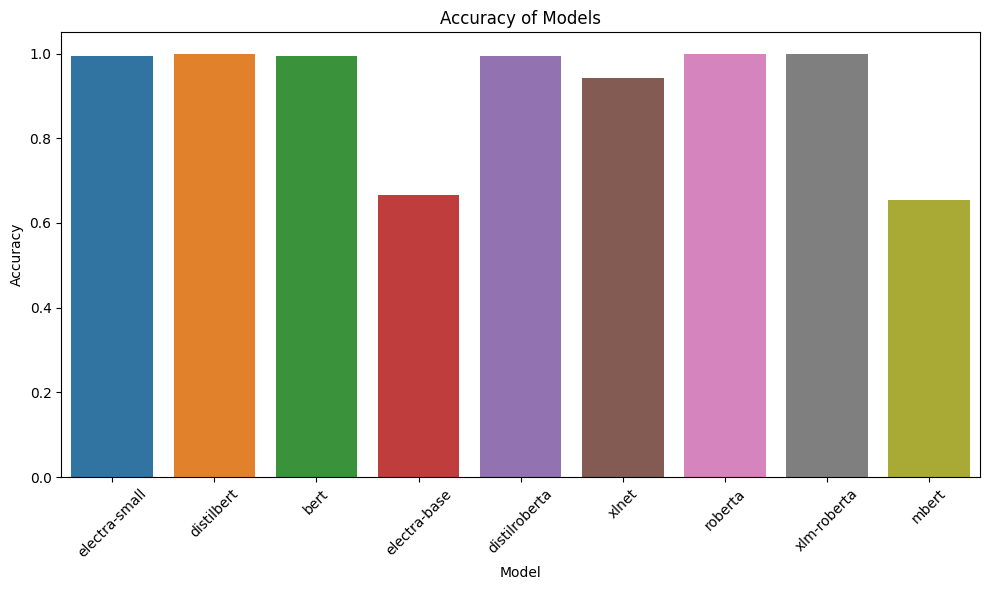

In [26]:
# Visualize accuracy for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Define custom text for sentiment analysis
custom_text = "मुझे वह item पसंद है जिसे आप अपनी वेबसाइट बेच रहे हैं"

# Preprocess the text
cleaned_text = clean_text(custom_text)
cleaned_text= rem_english(custom_text)
translated_text = translate_text(cleaned_text)


In [28]:
# Define a function to map predicted labels to positive and negative sentiments
def map_label_to_sentiment(label):
    if label == 'LABEL_1':
        return 'positive'
    elif label == 'LABEL_0':
        return 'negative'
    else:
        return 'unknown'



In [29]:
# Perform sentiment analysis on both versions of the text using all models
sentiments_original = {}
sentiments_translated = {}
for model_name, pipeline_sentiment in pipelines.items():
    labels_original, _ = get_sentiment(pipeline_sentiment, cleaned_text)
    labels_translated, _ = get_sentiment(pipeline_sentiment, translated_text)
    sentiments_original[model_name] = map_label_to_sentiment(labels_original[0])
    sentiments_translated[model_name] = map_label_to_sentiment(labels_translated[0])

    # Print predicted sentiment for each model
    print(f"Model: {model_name}, Predicted Sentiment (Original): {sentiments_original[model_name]}, Predicted Sentiment (Translated): {sentiments_translated[model_name]}")



Model: electra-small, Predicted Sentiment (Original): positive, Predicted Sentiment (Translated): positive
Model: distilbert, Predicted Sentiment (Original): negative, Predicted Sentiment (Translated): negative
Model: bert, Predicted Sentiment (Original): negative, Predicted Sentiment (Translated): negative
Model: electra-base, Predicted Sentiment (Original): negative, Predicted Sentiment (Translated): negative
Model: distilroberta, Predicted Sentiment (Original): negative, Predicted Sentiment (Translated): negative
Model: xlnet, Predicted Sentiment (Original): positive, Predicted Sentiment (Translated): positive
Model: roberta, Predicted Sentiment (Original): positive, Predicted Sentiment (Translated): positive
Model: xlm-roberta, Predicted Sentiment (Original): positive, Predicted Sentiment (Translated): positive
Model: mbert, Predicted Sentiment (Original): positive, Predicted Sentiment (Translated): positive


In [30]:
# Calculate accuracy for each model on both versions of the text
accuracy_original = {}
accuracy_translated = {}
for model_name in models.keys():
    accuracy_original[model_name] = 1 if sentiments_original[model_name] == 'positive' else 0
    accuracy_translated[model_name] = 1 if sentiments_translated[model_name] == 'positive' else 0



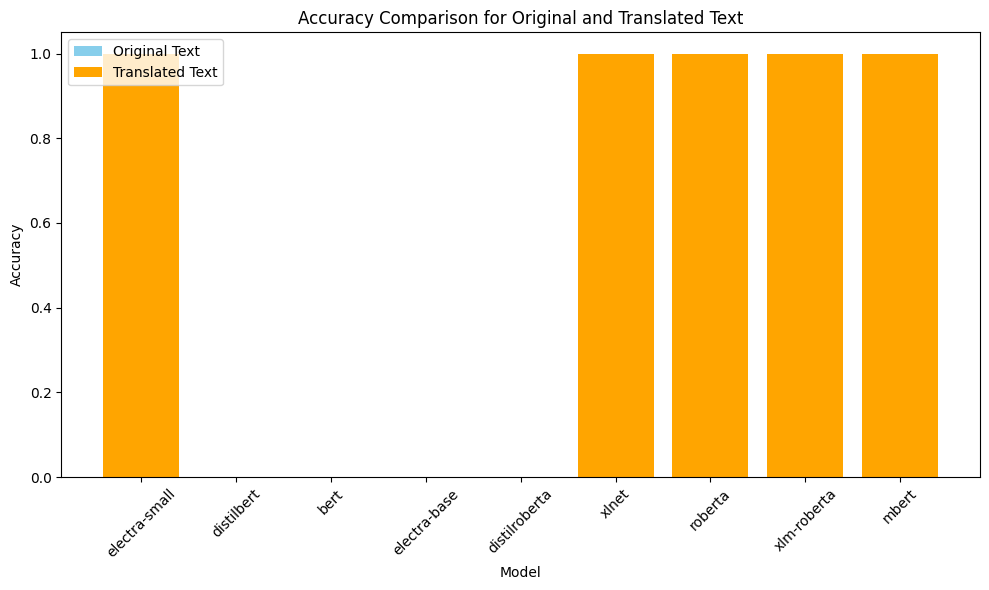

In [31]:
# Visualize the accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_original.keys(), accuracy_original.values(), color='skyblue', label='Original Text')
plt.bar(accuracy_translated.keys(), accuracy_translated.values(), color='orange', label='Translated Text')
plt.title('Accuracy Comparison for Original and Translated Text')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
